# Question 4

Let $A\in \mathbb{R}^{n\times n}$ be a diagonal matrix with diagonal entries 
$$A_{ii} = i,\quad \text{i.e. the entries run from $1$ to $n$},$$
and let $b\in \mathbb{R}^n$ a vector with all $1$ entries. Define the function
$$f(x) = \frac{1}{2}x^T A x - b^T x.$$
We want to compare the convergence behavior of conjugate gradient (version 0 or 1)
and gradient descent. Do the following for $n=20$ and $n=100$ with initialization
$x^{(0)} = 0$.

In [9]:
import numpy as np
from matplotlib import pyplot as plt

## Part A

Find the optimal solution $x^*$ by solving $Ax = b$ using a Matlab/Python
linear equation solver (or by hand and hard code the answer).

In [10]:
def A(n):
  return np.diag(np.arange(1, n+1))

def b(n):
  return np.ones(n)

def x_opt(n):
  return np.linalg.solve(A(n), b(n))


## Part B

Program and run the gradient descent method for $f$ with a fixed stepsize. Run
the method for $n$ iterations. You may experiment with the stepsize until you
see something that works or use a stepsize dictated by a theorem in the class.

In [11]:
def f(x, n):
  return 1/2 * x.T @ A(n) @ x - b(n) @ x

def df(x, n):
  return A(n) @ x - b(n)

def gd(x, n, mu = 2e-2):
  return x - mu * df(x, n)

In [12]:
N = [20, 100]

gd_x_values = [[], []]
gd_f_values = [[], []]

for n in N:
  x = np.zeros(n)
  for i in range(n):
    gd_x_values[N.index(n)].append(np.linalg.norm(x - x_opt(n)))
    gd_f_values[N.index(n)].append(f(x, n) - f(x_opt(n), n))
    x = gd(x, n)  

## Part C

Program and run the conjugate gradient (version 0 or 1) for $f$. Run the method
for $n$ iterations.

In [13]:
N = [20, 100]

cgd_x_values = [[], []]
cgd_f_values = [[], []]

for n in N:
  x = np.zeros(n)
  r = df(x, n)
  p = -r

  for i in range(n):
    cgd_x_values[N.index(n)].append(max(np.linalg.norm(x - x_opt(n)), 1e-16))
    cgd_f_values[N.index(n)].append(max(f(x, n) - f(x_opt(n), n), 1e-16))

    alpha = r.T @ r / (p.T @ A(n) @ p)
    x += alpha * p
    r_new = r + alpha * A(n) @ p
    beta = r_new.T @ r_new / (r.T @ r)
    p = -r_new + beta * p
    r = r_new

Plot the $f(x^{(t)}) - f(x^*)$ for both methods in the same figure. In a different
figure, plot $\|x^{(t)}-x^*\|$ for both methods. If you encounter a number smaller
than $10^{-16}$, set it to be $10^{-16}$. In both plots, make the logarithmic scale
for the vertical axis. Comment on the plots.

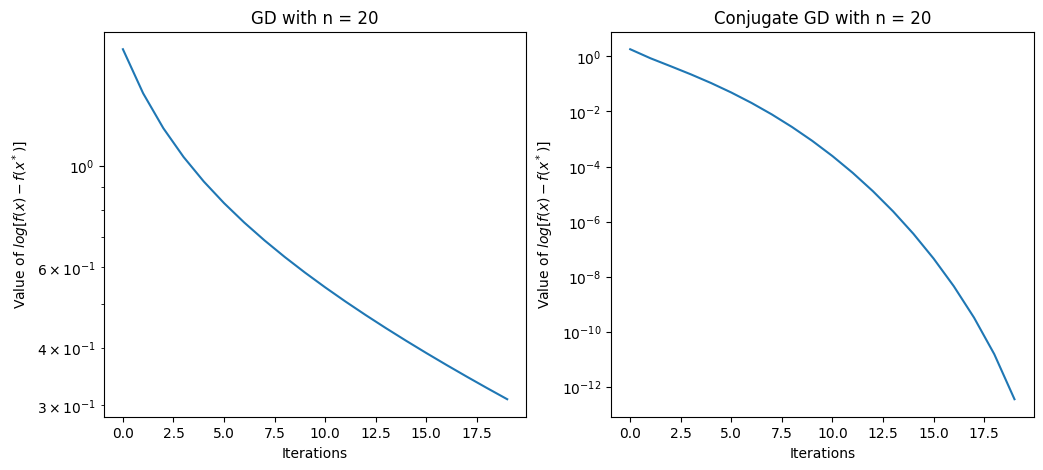

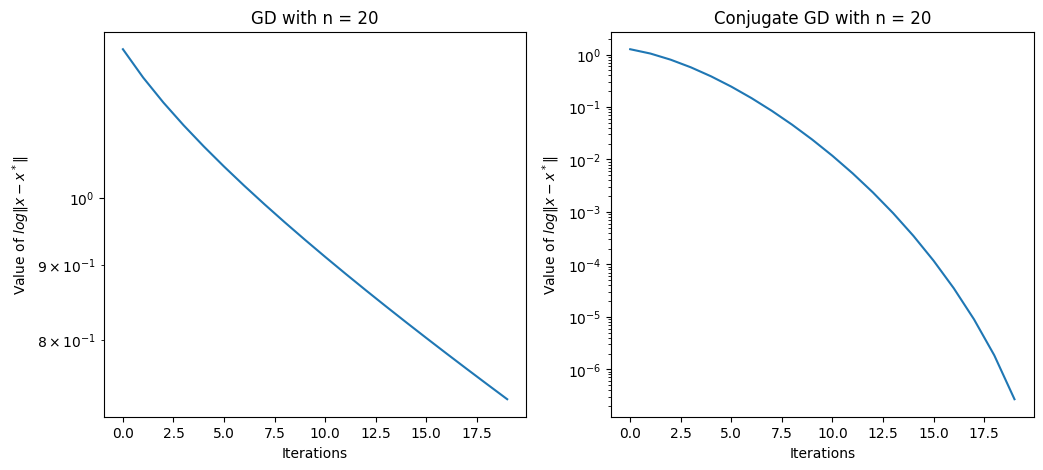

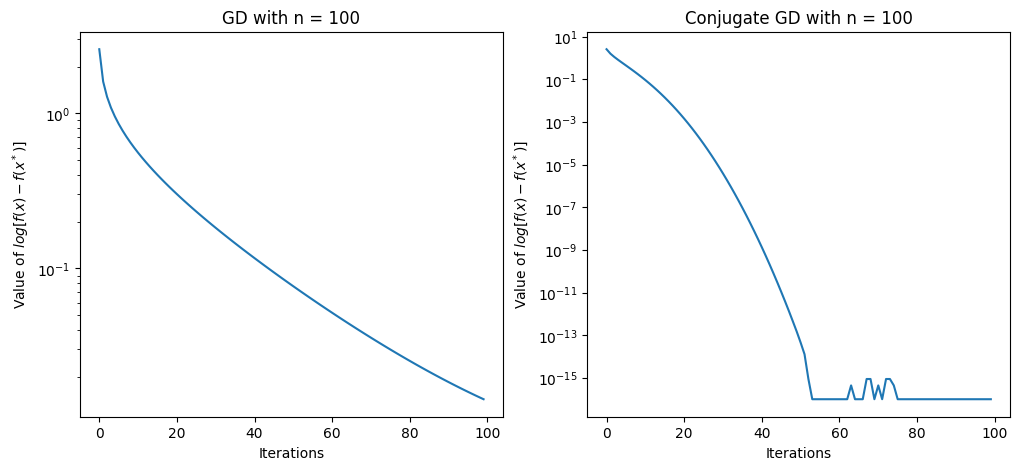

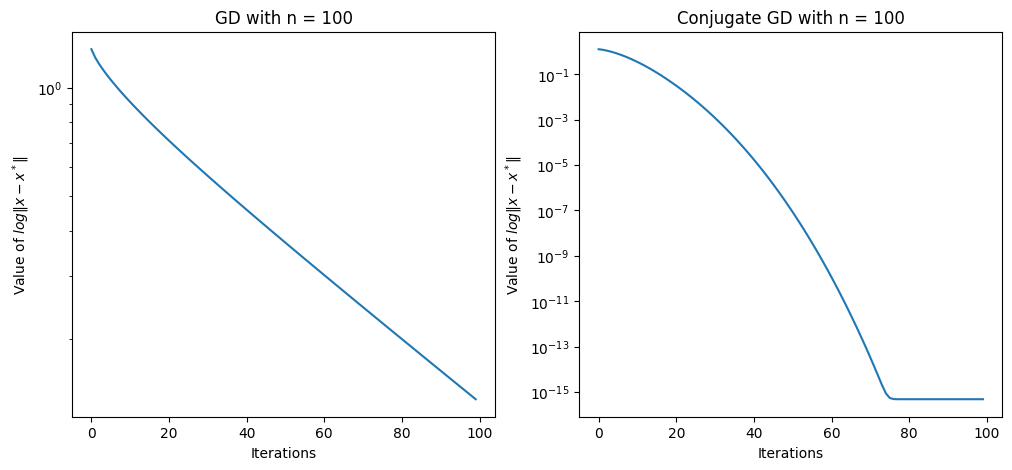

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(20), gd_f_values[0])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log [f(x) - f(x^*)]$")
plt.title(f"GD with n = 20")

plt.subplot(1, 2, 2)
plt.plot(range(20), cgd_f_values[0])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log [f(x) - f(x^*)]$")
plt.title(f"Conjugate GD with n = 20")

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(20), gd_x_values[0])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log \|x - x^*\|$")
plt.title(f"GD with n = 20")

plt.subplot(1, 2, 2)
plt.plot(range(20), cgd_x_values[0])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log \|x - x^*\|$")
plt.title(f"Conjugate GD with n = 20")

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(100), gd_f_values[1])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log [f(x) - f(x^*)]$")
plt.title(f"GD with n = 100")

plt.subplot(1, 2, 2)
plt.plot(range(100), cgd_f_values[1])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log [f(x) - f(x^*)]$")
plt.title(f"Conjugate GD with n = 100")

plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(100), gd_x_values[1])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log \|x - x^*\|$")
plt.title(f"GD with n = 100")

plt.subplot(1, 2, 2)
plt.plot(range(100), cgd_x_values[1])
plt.yscale('log')
plt.xlabel(f"Iterations")
plt.ylabel(r"Value of $log \|x - x^*\|$")
plt.title(f"Conjugate GD with n = 100")

plt.show()

The conjugate gradient descent method converges significantly faster than the
standard gradient descent. The conjugate gradient descent method indeed
converges within $n$ iterations, agreeing with the theorem we learned.